In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K

from sklearn.model_selection import KFold
from keras.models import Model, Sequential
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
from ipynb.fs.full.DatasetManage import read_and_store_data
from ipynb.fs.full.FeatureExtraction import feature_extraction
from ipynb.fs.full.ClassificationPerformanceIndexes import classificationPerformanceIndexes, printClassificationPerformanceIndexes
from ipynb.fs.full.ClassificationMethods import CompleteLSTM

Parameter

In [4]:
perfInd = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'MCC', 'Kappa', 'Time']
channels = ['FP1-F7', 'F7-T7','T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'seizure']

dataset = 'CHB_MIT'
csvImportFile = 'CHB.csv'
csvExportFile = 'CHB.csv'
sample_rate = 256
time_window = 2
step = time_window * sample_rate

test_ratio = 0.3

pca_tolerance = 0.9

undersampling_rate = 0.2

oversampling_neighbors = 11

k_fold = 5

csvAverageFile = 'Features.csv'

batch = 10
epochs = 100
dropout_percentage = 0.2
loss_function = 'mean_squared_error'
metric = 'accuracy'

Create Training and Test Data

In [5]:
def trainTestData (features, test_ratio, k_fold, perfInd):
    x = features.loc[:, features.columns != 'seizure']
    y = features['seizure']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_ratio, shuffle = True)
    results = pd.DataFrame(columns = perfInd)
    kf = KFold(n_splits = k_fold, shuffle = True)
    return x_train, x_test, y_train, y_test, results, kf

Read and Store Data

In [6]:
print('Reading data from', csvImportFile)
df = pd.read_csv(csvImportFile, delimiter = ',', header = 0)

Reading data from CHB.csv


Feature Extraction 

In [7]:
# ft = feature_extraction(df, sample_rate, step, pca_tolerance, undersampling_rate, oversampling_neighbors)

Train and Test process

In [8]:
ft = pd.read_csv(csvAverageFile, delimiter = ',', header = 0)

In [9]:
x_train, x_test, y_train, y_test, results, kf = trainTestData (ft, test_ratio, k_fold, perfInd)

x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
y_train = y_train.values.astype(int)
x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
y_test = y_test.values.astype(int)

In [10]:
model = Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(None, x_train.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))


history = model.fit(x_train,
                    steps_per_epoch=500,
                    epochs=2)


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

1D Convolutional Model

In [ ]:
# Definizione dell'architettura della rete neurale

num_classes = 2
input_channels = 87

model = tf.keras.Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(1, input_channels)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compilazione del modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.compile(optimizer='rmsprop', loss='mae')

# Training 

# X_train = X_train.reshape(-1, input_length, input_channels)

num_epochs = 20
batch_size = 8
model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size)

# Evaluation of the model

# X_test = X_test.reshape(-1, input_length, input_channels)
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)

# Utilizzo del modello per effettuare predizioni
predictions = model.predict(x_test)


1D CN

In [ ]:
model = Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(None, x_train.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')
history = model.fit(x_train,
                    y_train,
                    steps_per_epoch=350,
                    epochs=20)

GRU

1 layer

Epoch 1/180
17/17 [==============================] - 2s 28ms/step - loss: 0.7151 - accuracy: 0.5679 - val_loss: 0.6655 - val_accuracy: 0.6667
Epoch 2/180
17/17 [==============================] - 0s 6ms/step - loss: 0.6768 - accuracy: 0.6049 - val_loss: 0.6393 - val_accuracy: 0.7619
Epoch 3/180
17/17 [==============================] - 0s 6ms/step - loss: 0.6471 - accuracy: 0.6914 - val_loss: 0.6152 - val_accuracy: 0.7619
Epoch 4/180
17/17 [==============================] - 0s 6ms/step - loss: 0.6201 - accuracy: 0.7284 - val_loss: 0.5924 - val_accuracy: 0.7619
Epoch 5/180
17/17 [==============================] - 0s 7ms/step - loss: 0.5942 - accuracy: 0.7531 - val_loss: 0.5703 - val_accuracy: 0.8095
Epoch 6/180
17/17 [==============================] - 0s 6ms/step - loss: 0.5698 - accuracy: 0.8148 - val_loss: 0.5499 - val_accuracy: 0.8095
Epoch 7/180
17/17 [==============================] - 0s 6ms/step - loss: 0.5471 - accuracy: 0.8395 - val_loss: 0.5305 - val_accuracy: 0.8571
Epoch 8/180


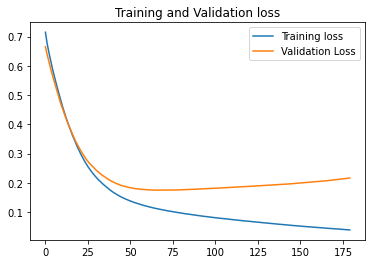

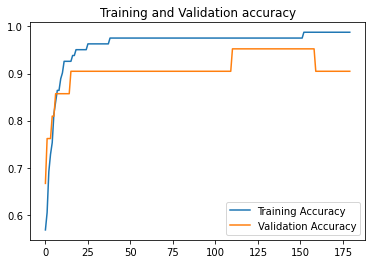

6/6 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8452
Test Loss: 0.3128911554813385
Test Accuracy: 0.8452380895614624
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_36 (GRU)                (None, 64)                29184     
                                                                 
 dense_33 (Dense)            (None, 1)                 65        
                                                                 
Total params: 29,249
Trainable params: 29,249
Non-trainable params: 0
_________________________________________________________________


In [22]:
from keras import optimizers

# Dividere i dati in training set e validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(layers.GRU(64, input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

# optimizer = optimizers.Adam(learning_rate=0.001)  
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=180, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

model.summary()

2 layers 

Epoch 1/180
11/11 [==============================] - 5s 125ms/step - loss: 0.5915 - accuracy: 0.8039 - val_loss: 0.5638 - val_accuracy: 0.8462
Epoch 2/180
11/11 [==============================] - 0s 12ms/step - loss: 0.5792 - accuracy: 0.8235 - val_loss: 0.5581 - val_accuracy: 0.8462
Epoch 3/180
11/11 [==============================] - 0s 9ms/step - loss: 0.5701 - accuracy: 0.8235 - val_loss: 0.5532 - val_accuracy: 0.8462
Epoch 4/180
11/11 [==============================] - 0s 9ms/step - loss: 0.5617 - accuracy: 0.8431 - val_loss: 0.5484 - val_accuracy: 0.8462
Epoch 5/180
11/11 [==============================] - 0s 11ms/step - loss: 0.5538 - accuracy: 0.8431 - val_loss: 0.5433 - val_accuracy: 0.8462
Epoch 6/180
11/11 [==============================] - 0s 8ms/step - loss: 0.5454 - accuracy: 0.8431 - val_loss: 0.5382 - val_accuracy: 0.8462
Epoch 7/180
11/11 [==============================] - 0s 9ms/step - loss: 0.5370 - accuracy: 0.8431 - val_loss: 0.5338 - val_accuracy: 0.8462
Epoch 8/1

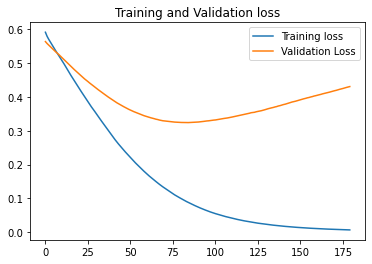

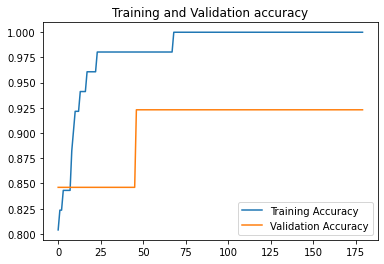

6/6 [==============================] - 0s 4ms/step - loss: 0.2658 - accuracy: 0.9107
Test Loss: 0.265824556350708
Test Accuracy: 0.9107142686843872
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_39 (GRU)                (None, None, 32)          11520     
                                                                 
 gru_40 (GRU)                (None, 16)                2400      
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13,937
Trainable params: 13,937
Non-trainable params: 0
_________________________________________________________________


In [24]:
from keras import optimizers

# Dividere i dati in training set e validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1]),return_sequences=True))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

#optimizer = optimizers.Adam(learning_rate=0.001) 
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=180, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


model.summary()


1 layer + Dropout

Epoch 1/180
4/4 [==============================] - 3s 190ms/step - loss: 0.6433 - accuracy: 0.6000 - val_loss: 0.4119 - val_accuracy: 1.0000
Epoch 2/180
4/4 [==============================] - 0s 19ms/step - loss: 0.6152 - accuracy: 0.7000 - val_loss: 0.4082 - val_accuracy: 1.0000
Epoch 3/180
4/4 [==============================] - 0s 20ms/step - loss: 0.6590 - accuracy: 0.6500 - val_loss: 0.4056 - val_accuracy: 1.0000
Epoch 4/180
4/4 [==============================] - 0s 22ms/step - loss: 0.6507 - accuracy: 0.5500 - val_loss: 0.4033 - val_accuracy: 1.0000
Epoch 5/180
4/4 [==============================] - 0s 23ms/step - loss: 0.6009 - accuracy: 0.7000 - val_loss: 0.4009 - val_accuracy: 1.0000
Epoch 6/180
4/4 [==============================] - 0s 19ms/step - loss: 0.5517 - accuracy: 0.7500 - val_loss: 0.3986 - val_accuracy: 1.0000
Epoch 7/180
4/4 [==============================] - 0s 23ms/step - loss: 0.6213 - accuracy: 0.6000 - val_loss: 0.3967 - val_accuracy: 1.0000
Epoch 8/180
4/4 [==

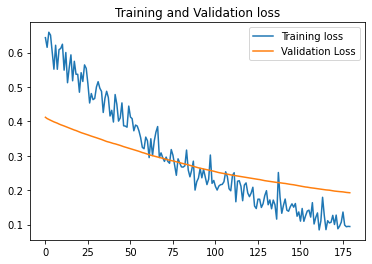

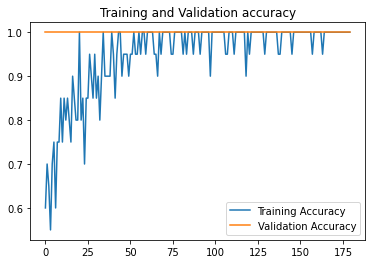

6/6 [==============================] - 0s 4ms/step - loss: 0.3386 - accuracy: 0.8512
Test Loss: 0.33864283561706543
Test Accuracy: 0.851190447807312


In [28]:
from keras import optimizers

# Dividere i dati in training set e validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

# optimizer = optimizers.Adam(learning_rate=0.001)  # Utilizzo dell'ottimizzatore Adam con un learning rate più basso
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=180, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


2 layers + Dropout

Epoch 1/180
5/5 [==============================] - 3s 178ms/step - loss: 0.6804 - accuracy: 0.6800 - val_loss: 0.7127 - val_accuracy: 0.2857
Epoch 2/180
5/5 [==============================] - 0s 16ms/step - loss: 0.6823 - accuracy: 0.6400 - val_loss: 0.7127 - val_accuracy: 0.2857
Epoch 3/180
5/5 [==============================] - 0s 16ms/step - loss: 0.6865 - accuracy: 0.6000 - val_loss: 0.7122 - val_accuracy: 0.2857
Epoch 4/180
5/5 [==============================] - 0s 15ms/step - loss: 0.6854 - accuracy: 0.6800 - val_loss: 0.7119 - val_accuracy: 0.2857
Epoch 5/180
5/5 [==============================] - 0s 15ms/step - loss: 0.6799 - accuracy: 0.6000 - val_loss: 0.7121 - val_accuracy: 0.2857
Epoch 6/180
5/5 [==============================] - 0s 15ms/step - loss: 0.6860 - accuracy: 0.6000 - val_loss: 0.7120 - val_accuracy: 0.2857
Epoch 7/180
5/5 [==============================] - 0s 14ms/step - loss: 0.6836 - accuracy: 0.6800 - val_loss: 0.7118 - val_accuracy: 0.2857
Epoch 8/180
5/5 [==

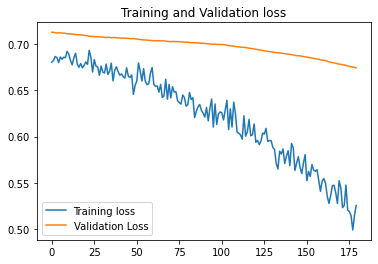

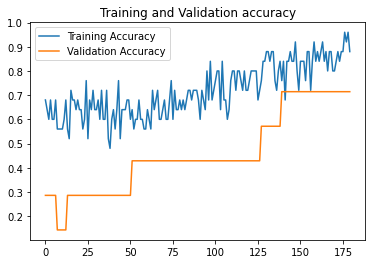

6/6 [==============================] - 0s 4ms/step - loss: 0.6193 - accuracy: 0.7500
Test Loss: 0.6192542314529419
Test Accuracy: 0.75


In [ ]:
from keras import optimizers

# Dividere i dati in training set e validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

#optimizer = optimizers.Adam(learning_rate=0.001) 
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=180, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

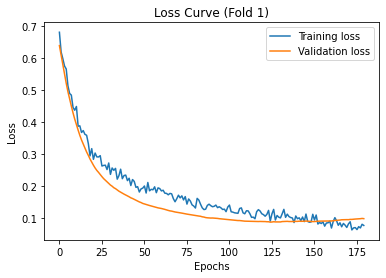

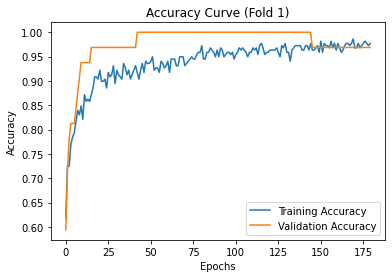

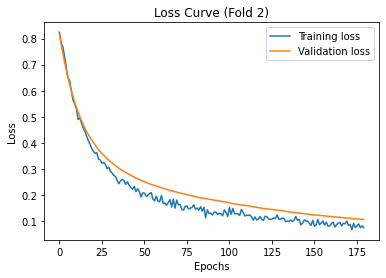

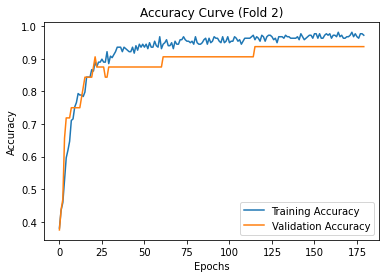

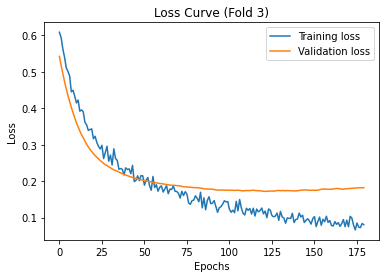

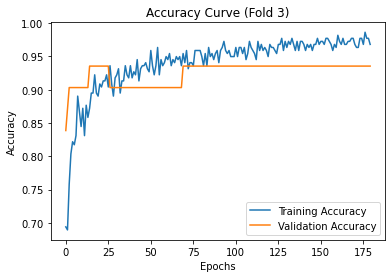

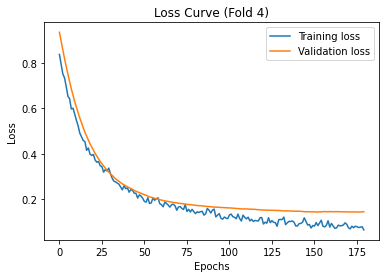

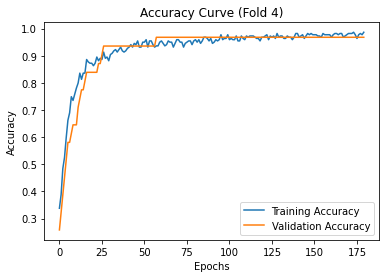

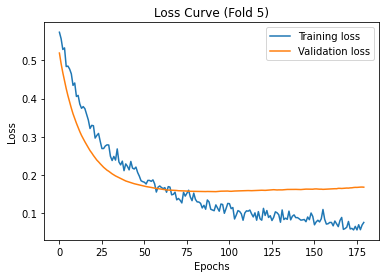

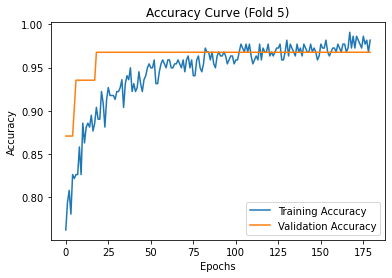

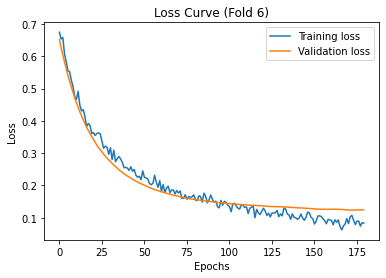

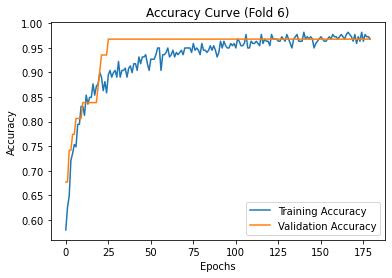

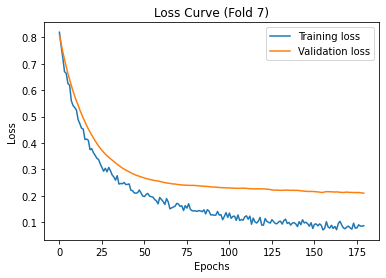

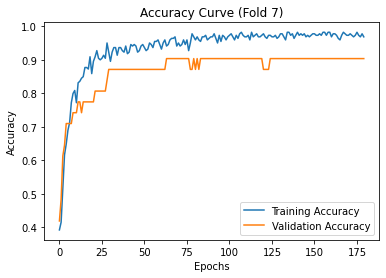

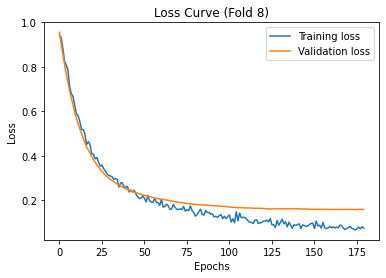

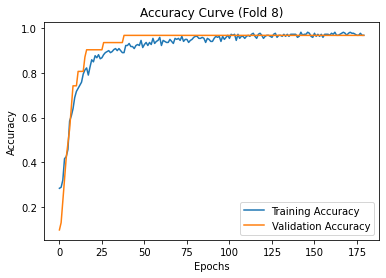

Mean Loss: 0.1488
Mean Accuracy: 0.9520


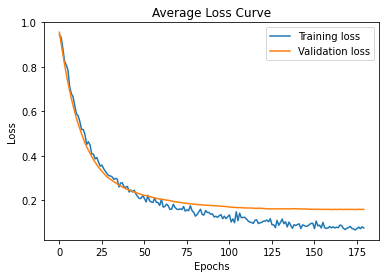

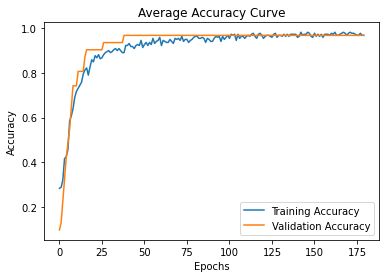

6/6 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 0.9345
Test Loss: 0.14702840149402618
Test Accuracy: 0.9345238208770752


In [17]:
from keras import optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Define the number of folds (K)
k = 8

# Create lists to store the evaluation metrics for each fold
loss_scores = []
acc_scores = []

# Create an instance of KFold with the desired number of folds
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in kfold.split(x_train):
    # Split the data into training set and validation set for the current fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a new model for each fold
    model = Sequential()
    model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, x_train.shape[-1])))
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model with the desired optimizer and loss function
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model on the current training set
   # history = model.fit(x_train_fold, y_train_fold, batch_size=5, epochs=180, verbose=0)
    history = model.fit(x_train_fold, y_train_fold, batch_size=5, epochs=180, verbose=0, validation_data=(x_val_fold, y_val_fold))


    # Evaluate the model on the current validation set
    loss, acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    # Record the evaluation metrics for the current fold
    loss_scores.append(loss)
    acc_scores.append(acc)

    # Plot the loss curve for the current fold
    plt.figure()
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Loss Curve (Fold {})'.format(len(loss_scores)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot the accuracy curve for the current fold
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve (Fold {})'.format(len(acc_scores)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Calculate the mean of the evaluation metrics across folds
mean_loss = np.mean(loss_scores)
mean_acc = np.mean(acc_scores)

# Print the mean evaluation metrics
print("Mean Loss: {:.4f}".format(mean_loss))
print("Mean Accuracy: {:.4f}".format(mean_acc))

# Plot the average loss curve
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Average Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the average accuracy curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Average Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Mean Loss: 0.2496
Mean Accuracy: 0.9125


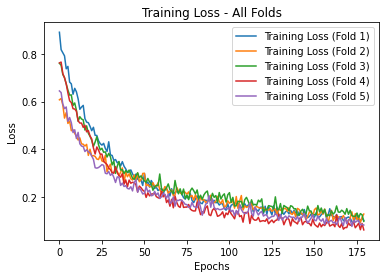

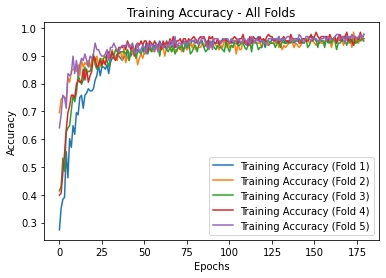

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import RMSprop

# Define the number of folds (K)
k = 5

# Create lists to store the evaluation metrics for each fold
loss_scores = []
acc_scores = []
history_list = []  # Add this line

# Create an instance of KFold with the desired number of folds
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in kfold.split(x_train):
    # Split the data into training set and validation set for the current fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a new model for each fold
    model = Sequential()
    model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, x_train.shape[-1])))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with the desired optimizer and loss function
    optimizer = RMSprop(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model on the current training set
    history = model.fit(x_train_fold, y_train_fold, batch_size=5, epochs=180, verbose=0,
                        validation_data=(x_val_fold, y_val_fold))
    history_list.append(history)

    # Evaluate the model on the current validation set
    loss, acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    # Record the evaluation metrics for the current fold
    loss_scores.append(loss)
    acc_scores.append(acc)

# Calculate the mean of the evaluation metrics across folds
mean_loss = np.mean(loss_scores)
mean_acc = np.mean(acc_scores)

# Print the mean evaluation metrics
print("Mean Loss: {:.4f}".format(mean_loss))
print("Mean Accuracy: {:.4f}".format(mean_acc))

# Plot the average loss curve
plt.figure()
for i in range(len(loss_scores)):
    plt.plot(history_list[i].history['loss'], label='Training Loss (Fold {})'.format(i+1))
plt.title('Training Loss - All Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the average accuracy curve
plt.figure()
for i in range(len(acc_scores)):
    plt.plot(history_list[i].history['accuracy'], label='Training Accuracy (Fold {})'.format(i+1))
plt.title('Training Accuracy - All Folds')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


2 layers + 2 Dropout

Epoch 1/180
26/26 [==============================] - 4s 41ms/step - loss: 0.6624 - accuracy: 0.7734 - val_loss: 0.6383 - val_accuracy: 0.7812
Epoch 2/180
26/26 [==============================] - 1s 20ms/step - loss: 0.6260 - accuracy: 0.7891 - val_loss: 0.5875 - val_accuracy: 0.7812
Epoch 3/180
26/26 [==============================] - 1s 19ms/step - loss: 0.5259 - accuracy: 0.8828 - val_loss: 0.4576 - val_accuracy: 0.9062
Epoch 4/180
26/26 [==============================] - 0s 18ms/step - loss: 0.2672 - accuracy: 0.9531 - val_loss: 0.3468 - val_accuracy: 0.8438
Epoch 5/180
26/26 [==============================] - 0s 18ms/step - loss: 0.1631 - accuracy: 0.9453 - val_loss: 0.3385 - val_accuracy: 0.8750
Epoch 6/180
26/26 [==============================] - 0s 18ms/step - loss: 0.0680 - accuracy: 0.9844 - val_loss: 0.2685 - val_accuracy: 0.8750
Epoch 7/180
26/26 [==============================] - 0s 19ms/step - loss: 0.1321 - accuracy: 0.9609 - val_loss: 0.2641 - val_accuracy: 0.8750
Epoch 

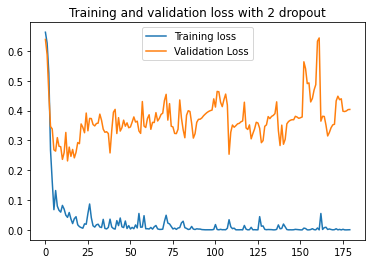

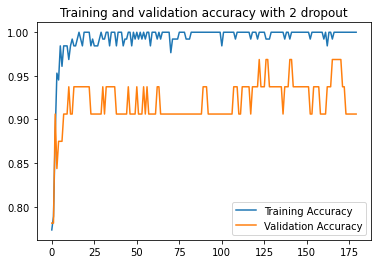

In [ ]:
from keras import optimizers
from sklearn.model_selection import train_test_split

# Dividere i dati in training set e validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(layers.GRU(64,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Dropout(0.3))  # Added dropout layer
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=5, epochs=180, validation_data=(x_val, y_val))



# Plotting
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))


plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss with 2 dropout')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and validation accuracy with 2 dropout')
plt.legend()
plt.show()


Early stopping + validation

Epoch 1/100
10/10 [==============================] - 8s 190ms/step - loss: 0.6925 - accuracy: 0.4665 - val_loss: 0.6916 - val_accuracy: 0.6076
Epoch 2/100
10/10 [==============================] - 0s 45ms/step - loss: 0.6890 - accuracy: 0.6518 - val_loss: 0.6866 - val_accuracy: 0.6582
Epoch 3/100
10/10 [==============================] - 0s 45ms/step - loss: 0.6780 - accuracy: 0.7412 - val_loss: 0.6731 - val_accuracy: 0.7595
Epoch 4/100
10/10 [==============================] - 0s 44ms/step - loss: 0.6590 - accuracy: 0.7732 - val_loss: 0.6393 - val_accuracy: 0.8481
Epoch 5/100
10/10 [==============================] - 0s 44ms/step - loss: 0.6117 - accuracy: 0.8147 - val_loss: 0.5548 - val_accuracy: 0.8608
Epoch 6/100
10/10 [==============================] - 0s 51ms/step - loss: 0.4545 - accuracy: 0.9042 - val_loss: 0.3178 - val_accuracy: 0.9114
Epoch 7/100
10/10 [==============================] - 0s 46ms/step - loss: 0.2281 - accuracy: 0.9393 - val_loss: 0.2406 - val_accuracy: 0.9367
Epoch

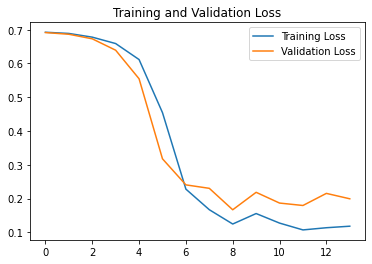

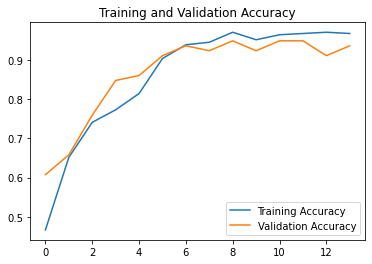

In [ ]:
from keras import optimizers
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import GRU, Reshape, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Definizione del modello
model = Sequential()
model.add(GRU(64,
              dropout=0.2,
              recurrent_dropout=0.2,
              input_shape=(None, x_train.shape[-1])))
model.add(Reshape((model.output_shape[1], 1)))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)

# Addestramento con early stopping
history4 = model.fit(x_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])

# Plot dell'andamento della loss e dell'accuracy
loss = history4.history['loss']
val_loss = history4.history['val_loss']
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()



K FOLD

Average Training Loss: 0.10775990085676312
Average Training Accuracy: 0.9839999973773956
Average Validation Loss: 0.21052378043532372
Average Validation Accuracy: 0.9320000112056732


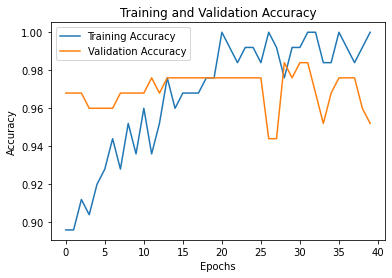

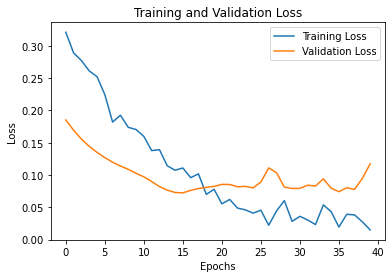

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras import optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Definizione del modello
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.15,
                     recurrent_dropout=0.15,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilazione del modello
optimizer = optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Definizione del k-fold cross-validation
k = 2
  # Numero di fold
kf = KFold(n_splits=k, shuffle=True)

# Liste per salvare le metriche di ogni fold
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Esecuzione del k-fold cross-validation
for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Addestramento del modello sul fold corrente
    history = model.fit(x_train_fold, y_train_fold, epochs=40, validation_data=(x_val_fold, y_val_fold), verbose=0)
    
    # Calcolo delle metriche sul fold corrente
    train_loss, train_acc = model.evaluate(x_train_fold, y_train_fold, verbose=0)
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    
    # Salvataggio delle metriche
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

# Calcolo delle medie delle metriche dei fold
avg_train_loss = sum(train_losses) / k
avg_train_acc = sum(train_accs) / k
avg_val_loss = sum(val_losses) / k
avg_val_acc = sum(val_accs) / k

# Stampa delle metriche medie
print("Average Training Loss:", avg_train_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Loss:", avg_val_loss)
print("Average Validation Accuracy:", avg_val_acc)

# Primo grafico - Training e Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Secondo grafico - Training e Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.tight_layout()  # Per evitare sovrapposizione di assi e titoli
plt.show()

kfold + test

Average Training Loss: 0.20781814058621725
Average Training Accuracy: 0.9659476280212402
Average Validation Loss: 0.24783137192328772
Average Validation Accuracy: 0.9560623367627462


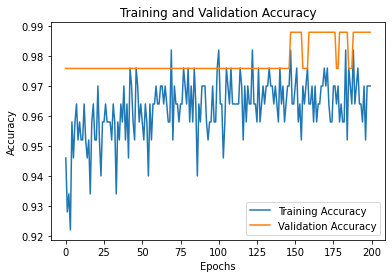

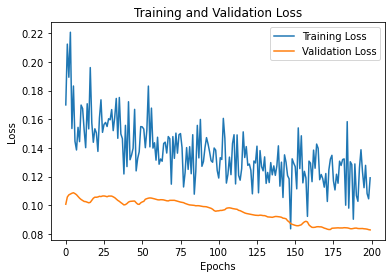

<Figure size 432x288 with 0 Axes>

6/6 [==============================] - 0s 4ms/step - loss: 0.1110 - accuracy: 0.9762
Test Loss: 0.11103323847055435
Test Accuracy: 0.976190447807312


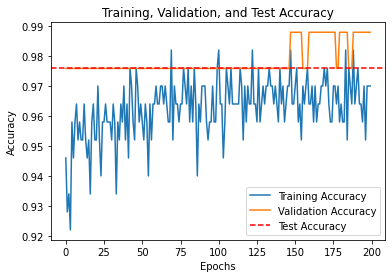

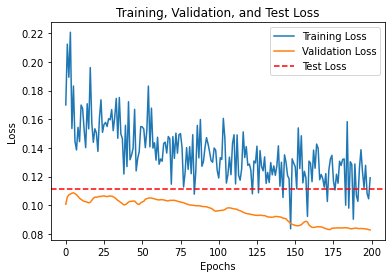

In [ ]:
from keras import optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Definizione del modello
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.20,
                     recurrent_dropout=0.15,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilazione del modello
optimizer = optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Definizione del k-fold cross-validation
k = 3
  # Numero di fold
kf = KFold(n_splits=k, shuffle=True)

# Liste per salvare le metriche di ogni fold
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Esecuzione del k-fold cross-validation
for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Addestramento del modello sul fold corrente
    history = model.fit(x_train_fold, y_train_fold, epochs=200, validation_data=(x_val_fold, y_val_fold), verbose=0)
    
    # Calcolo delle metriche sul fold corrente
    train_loss, train_acc = model.evaluate(x_train_fold, y_train_fold, verbose=0)
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    
    # Salvataggio delle metriche
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

# Calcolo delle medie delle metriche dei fold
avg_train_loss = sum(train_losses) / k
avg_train_acc = sum(train_accs) / k
avg_val_loss = sum(val_losses) / k
avg_val_acc = sum(val_accs) / k

# Stampa delle metriche medie
print("Average Training Loss:", avg_train_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Loss:", avg_val_loss)
print("Average Validation Accuracy:", avg_val_acc)

# Primo grafico - Training e Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Secondo grafico - Training e Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.tight_layout()  # Per evitare sovrapposizione di assi e titoli
plt.show()

# Valutazione del modello sui dati di test
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Grafico - Test Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Grafico - Test Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

LSTM 

In [ ]:
lstm_units = 128
dense_units = 32  

CompleteLSTM(x_train, x_test, y_train, y_test, results, ft, kf, perfInd, epochs, batch, lstm_units, dense_units, dropout_percentage, loss_function, metric)